In [1]:
# file nel quale viene cercato il modello ottimale per la previsione dei CFU a fine anno

In [2]:
import funzioni
from funzioni import *

import settings
from settings import *

/Users/nicolobertoli/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [3]:
#==================================================================================================================================================================
#                                                                      OPERAZIONI SUL DB
#==================================================================================================================================================================

In [4]:
%run preprocessing

carico il dataframe
dataframe caricato: 


,STU_ID,ANNO_ARRIVO_ATENEO,ANNO_AVVIO_CARRIERA,MOTIVO_CARRIERA,DATA_CHIUSURA,ANNO_CORSO,AA_OFF_ID,PESO,RIC_ID,TIPO_RIC_COD,SOVRAN_FLG,DEBITO_FLG,LIBERA_FLG,NO_MEDIA_FLG,MAT_ID,COD,DES,STA_SCE_COD,VOTO,LODE_FLG,DATA_FREQ,DATA_SUP,NUMERO,DATA_PRIMO_APPELLO,DATA_MAX_APPELLO
0,238006,2015,2015,TIT,2019-07-11 00:00:00,1,2015,9,0,NaN,0,0,0,0,344188,405,FISICA,S,19.0,0,2016-06-10 00:00:00,2016-07-05 00:00:00,2,2016-06-15 00:00:00,NaN
1,238006,2015,2015,TIT,2019-07-11 00:00:00,3,2018,6,0,NaN,0,0,0,0,344188,1007846,PROGRAMMAZIONE PARALLELA E HPC,S,27.0,0,NaN,2019-06-13 00:00:00,1,2019-06-13 00:00:00,NaN
2,238006,2015,2015,TIT,2019-07-11 00:00:00,1,2015,9,0,NaN,0,0,0,0,344188,18728,ALGEBRA E GEOMETRIA,S,18.0,0,2016-06-10 00:00:00,2016-09-22 00:00:00,2,2016-09-08 00:00:00,NaN




elimino le colonne che non mi interessano


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,ANNO_AVVIO_CARRIERA,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA
0,238006,FISICA,9,S,19.0,0,2,2015,2015,2016-06-10 00:00:00,NaN,2016-07-05 00:00:00,2016-06-15 00:00:00,2019-07-11 00:00:00
1,238006,PROGRAMMAZIONE PARALLELA E HPC,6,S,27.0,0,1,2018,2015,NaN,NaN,2019-06-13 00:00:00,2019-06-13 00:00:00,2019-07-11 00:00:00
2,238006,ALGEBRA E GEOMETRIA,9,S,18.0,0,2,2015,2015,2016-06-10 00:00:00,NaN,2016-09-22 00:00:00,2016-09-08 00:00:00,2019-07-11 00:00:00




elimino gli esami che non sono del primo anno
righe iniziali:  7025
righe eliminate:  4327
righe rimanenti:  2698


PESI sistemati:  10
segno gli esami contrassegnati con 'P' con 'F'
ho sistemato  0  esami


ordino gli esami in ordine alfabetico


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,ANNO_AVVIO_CARRIERA,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA
3510,251895,ALGEBRA E GEOMETRIA,9,S,22.0,0,0,2018,2016,2019-06-07 00:00:00,NaN,2017-06-15 00:00:00,NaN,NaN
3933,252957,ALGEBRA E GEOMETRIA,9,S,21.0,0,2,2016,2016,2017-06-09 00:00:00,NaN,2017-11-22 00:00:00,2017-09-20 00:00:00,2020-10-29 00:00:00
3957,252967,ALGEBRA E GEOMETRIA,9,S,30.0,1,1,2016,2016,2017-06-09 00:00:00,NaN,2017-06-14 00:00:00,2017-06-14 00:00:00,2020-04-23 00:00:00
3983,252989,ALGEBRA E GEOMETRIA,9,S,23.0,0,0,2014,2016,2015-06-13 00:00:00,NaN,2016-09-29 00:00:00,NaN,NaN
4006,252991,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2016,2016,2017-06-09 00:00:00,NaN,NaN,NaN,2017-03-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,263961,INGLESE B1,3,S,NaN,0,3,2015,2015,2016-01-15 00:00:00,NaN,2021-02-17 00:00:00,2020-06-26 00:00:00,NaN
1182,241205,INGLESE B1,3,F,NaN,0,4,2015,2015,2016-01-15 00:00:00,2017-02-09 00:00:00,NaN,2016-02-03 00:00:00,2017-02-27 00:00:00
4603,258626,INGLESE B1,3,S,NaN,0,1,2017,2017,NaN,NaN,2018-07-11 00:00:00,2018-07-11 00:00:00,NaN
1242,241318,INGLESE B1,3,F,NaN,0,0,2015,2015,2016-01-15 00:00:00,NaN,NaN,NaN,2016-05-16 00:00:00




elimino gli orari dalle date

prima:

STU_ID                              251895
DES                    ALGEBRA E GEOMETRIA
PESO                                     9
STA_SCE_COD                              S
VOTO                                  22.0
LODE_FLG                                 0
NUMERO                                   0
AA_OFF_ID                             2018
ANNO_AVVIO_CARRIERA                   2016
DATA_FREQ              2019-06-07 00:00:00
DATA_MAX_APPELLO                       NaN
DATA_SUP               2017-06-15 00:00:00
DATA_PRIMO_APPELLO                     NaN
DATA_CHIUSURA                          NaN
Name: 3510, dtype: object

dopo :

STU_ID                              251895
DES                    ALGEBRA E GEOMETRIA
PESO                                     9
STA_SCE_COD                              S
VOTO                                  22.0
LODE_FLG                                 0
NUMERO                                   0
AA_OFF_ID             

STU_ID                              249663
DES                    ALGEBRA E GEOMETRIA
PESO                                     9
STA_SCE_COD                              S
VOTO                                  28.0
LODE_FLG                                 0
NUMERO                                   1
AA_OFF_ID                             2016
ANNO_AVVIO_CARRIERA                   2016
DATA_FREQ                              NaN
DATA_MAX_APPELLO                       NaN
DATA_SUP                        2017-06-26
DATA_PRIMO_APPELLO              2017-06-26
DATA_CHIUSURA                   2020-12-17
PRIMO_ANNO                            2017
Name: 2581, dtype: object

STU_ID                              249663
DES                    ALGEBRA E GEOMETRIA
PESO                                     9
STA_SCE_COD                              S
VOTO                                  28.0
LODE_FLG                                 0
NUMERO                                   1
AA_OFF_ID                             2016
ANNO_AVVIO_CARRIERA                   2016
DATA_FREQ                       2017-06-10
DATA_MAX_APPELLO                       NaN
DATA_SUP                        2017-06-26
DATA_PRIMO_APPELLO              2017-06-26
DATA_CHIUSURA                   2020-12-17
PRIMO_ANNO                            2017
Name: 2581, dtype: object

2017
correzioni fatte:  139


elimino la colonna ANNO AVVIO CARRIERA


calcolo la feature 'GIORNI ESAME PASSATO'
calcolo la feature 'GIORNI ESAME PROVATO'


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
3510,251895,ALGEBRA E GEOMETRIA,9,S,22.0,0,0,2018,2019-06-07,NaN,2017-06-15,NaN,NaN,2017,-722,99999999
3933,252957,ALGEBRA E GEOMETRIA,9,S,21.0,0,2,2016,2017-06-09,NaN,2017-11-22,2017-09-20,2020-10-29,2017,166,103
3957,252967,ALGEBRA E GEOMETRIA,9,S,30.0,1,1,2016,2017-06-09,NaN,2017-06-14,2017-06-14,2020-04-23,2017,5,5
3983,252989,ALGEBRA E GEOMETRIA,9,S,23.0,0,0,2014,2015-06-13,NaN,2016-09-29,NaN,NaN,2017,474,99999999
4006,252991,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2016,2017-06-09,NaN,NaN,NaN,2017-03-31,2017,99999999,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,263961,INGLESE B1,3,S,NaN,0,3,2015,2016-01-15,NaN,2021-02-17,2020-06-26,NaN,2016,1860,1624
1182,241205,INGLESE B1,3,F,NaN,0,4,2015,2016-01-15,2017-02-09,NaN,2016-02-03,2017-02-27,2016,99999999,19
4603,258626,INGLESE B1,3,S,NaN,0,1,2017,2018-01-15,NaN,2018-07-11,2018-07-11,NaN,2018,177,177
1242,241318,INGLESE B1,3,F,NaN,0,0,2015,2016-01-15,NaN,NaN,NaN,2016-05-16,2016,99999999,99999999





       gestione valori mancanti o inconsistenti     


umero righe iniziali:  2698
primi anni:  [2017, 2016, 2018, 2015]
conteggi:  [132. 121. 133.   2.]
totale studenti:  388 

casi con giorni esame passato < 0, dovuto a data freq > data sup:  30
sistemo...
casi al termine:  0
casi con giorni esame provato mancante:  88
al termine:  0
casi con giorni esame provato mancante:  66
al termine:  0
aggiungo gli esami che sono mancanti per certi studenti
studente con esami mancanti:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
1328,241462,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2015,2016-06-10,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999
1329,241462,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2015,2016-01-15,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999
1330,241462,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2015,2016-06-10,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999


studente con esami mancanti sistemato:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
211,241462,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2015,2016-06-10,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999
2698,241462,ALGORITMI E STRUTTURE DATI I,9,F,NaN,0,0,2015,NaN,NaN,NaN,NaN,NaN,2016,99999999,99999999
2699,241462,ANALISI MATEMATICA,9,F,NaN,0,0,2015,NaN,NaN,NaN,NaN,NaN,2016,99999999,99999999
1448,241462,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2015,2016-01-15,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999
2700,241462,FISICA,9,F,NaN,0,0,2015,NaN,NaN,NaN,NaN,NaN,2016,99999999,99999999
2144,241462,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2015,2016-06-10,NaN,NaN,NaN,2015-12-18,2016,99999999,99999999
2701,241462,INGLESE B1,3,F,NaN,0,0,2015,NaN,NaN,NaN,NaN,NaN,2016,99999999,99999999


studente con esami mancanti:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
245,259589,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
1060,259589,ANALISI MATEMATICA,9,S,19.0,0,2,2020,2018-02-15,NaN,2018-07-26,2018-02-15,NaN,2018,10,0
1218,259589,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,1,2020,2020-12-18,2021-01-13,NaN,2021-01-13,NaN,2018,99999999,26
1616,259589,FISICA,9,S,22.0,0,4,2019,2019-01-18,NaN,2019-01-18,2019-01-18,NaN,2018,10,0
2281,259589,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2462,259589,INGLESE B1,3,S,NaN,0,1,2019,2018-01-15,NaN,2018-02-14,2018-02-14,NaN,2018,30,30


studente con esami mancanti sistemato:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
19,259589,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2702,259589,ALGORITMI E STRUTTURE DATI I,9,F,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
866,259589,ANALISI MATEMATICA,9,S,19.0,0,2,2020,2018-02-15,NaN,2018-07-26,2018-02-15,NaN,2018,10,0
1355,259589,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,1,2020,2020-12-18,2021-01-13,NaN,2021-01-13,NaN,2018,99999999,26
1778,259589,FISICA,9,S,22.0,0,4,2019,2019-01-18,NaN,2019-01-18,2019-01-18,NaN,2018,10,0
2032,259589,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2623,259589,INGLESE B1,3,S,NaN,0,1,2019,2018-01-15,NaN,2018-02-14,2018-02-14,NaN,2018,30,30


studente con esami mancanti:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
108,261487,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
935,261487,ANALISI MATEMATICA,9,F,NaN,0,0,2019,2020-01-17,NaN,NaN,NaN,NaN,2018,99999999,99999999
1524,261487,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2019,2020-01-17,NaN,NaN,NaN,NaN,2018,99999999,99999999
1876,261487,FISICA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2288,261487,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2512,261487,INGLESE B1,3,F,NaN,0,2,2019,2018-01-15,2019-02-06,NaN,2018-02-19,NaN,2018,99999999,35


studente con esami mancanti sistemato:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
349,261487,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2703,261487,ALGORITMI E STRUTTURE DATI I,9,F,NaN,0,0,2019,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
1063,261487,ANALISI MATEMATICA,9,F,NaN,0,0,2019,2020-01-17,NaN,NaN,NaN,NaN,2018,99999999,99999999
1297,261487,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2019,2020-01-17,NaN,NaN,NaN,NaN,2018,99999999,99999999
1716,261487,FISICA,9,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2028,261487,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2019,2020-06-05,NaN,NaN,NaN,NaN,2018,99999999,99999999
2384,261487,INGLESE B1,3,F,NaN,0,2,2019,2018-01-15,2019-02-06,NaN,2018-02-19,NaN,2018,99999999,35


studente con esami mancanti:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
1207,261297,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2017,2018-01-19,NaN,NaN,NaN,NaN,2018,99999999,99999999


studente con esami mancanti sistemato:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
2704,261297,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2705,261297,ALGORITMI E STRUTTURE DATI I,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2706,261297,ANALISI MATEMATICA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
1371,261297,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2017,2018-01-19,NaN,NaN,NaN,NaN,2018,99999999,99999999
2707,261297,FISICA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2708,261297,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2709,261297,INGLESE B1,3,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999


studente con esami mancanti:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
2187,261298,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2017,2018-06-08,NaN,NaN,NaN,NaN,2018,99999999,99999999


studente con esami mancanti sistemato:


,STU_ID,DES,PESO,STA_SCE_COD,VOTO,LODE_FLG,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
2710,261298,ALGEBRA E GEOMETRIA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2711,261298,ALGORITMI E STRUTTURE DATI I,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2712,261298,ANALISI MATEMATICA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2713,261298,ARCHITETTURA DEGLI ELABORATORI,6,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
2714,261298,FISICA,9,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999
1954,261298,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,15,F,NaN,0,0,2017,2018-06-08,NaN,NaN,NaN,NaN,2018,99999999,99999999
2715,261298,INGLESE B1,3,F,NaN,0,0,2017,NaN,NaN,NaN,NaN,NaN,2018,99999999,99999999


studenti per cui ci sono esami mancanti:  5
in totale ho aggiunto:  18  esami


controlli:


rimuovo STA_SCE_COD segnando voto = 0 quando l' esame non viene superato
rimuovo colonna lode segnando voto = 31 quando uno studente la ottiene


,STU_ID,DES,PESO,VOTO,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
0,251895,ALGEBRA E GEOMETRIA,9,22,4,2018,2017-06-15,NaN,2017-06-15,2017-06-15,NaN,2017,10,0
264,259584,ALGEBRA E GEOMETRIA,9,0,0,2017,2018-06-08,NaN,NaN,NaN,2020-10-13,2018,99999999,99999999
263,262641,ALGEBRA E GEOMETRIA,9,30,1,2017,2018-06-08,NaN,2018-06-21,2018-06-21,2020-10-29,2018,13,13
262,251032,ALGEBRA E GEOMETRIA,9,0,5,2016,2017-06-09,2019-07-17,NaN,2017-06-26,NaN,2017,99999999,17
261,263961,ALGEBRA E GEOMETRIA,9,19,1,2015,2016-06-10,NaN,2018-09-20,2018-09-20,NaN,2016,832,832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,241924,INGLESE B1,3,30,1,2015,2016-01-15,NaN,2016-06-28,2016-06-28,NaN,2016,165,165
2448,240104,INGLESE B1,3,0,1,2015,2016-01-15,2018-07-11,NaN,2018-07-11,NaN,2016,99999999,908
2447,265573,INGLESE B1,3,30,1,2017,2018-01-15,NaN,2018-02-09,2018-02-09,NaN,2018,25,25
2445,259917,INGLESE B1,3,30,1,2017,2018-01-15,NaN,2018-02-09,2018-02-09,NaN,2018,25,25




numero righe finali:  2716
primi anni:  [2017, 2018, 2016, 2015]
conteggi:  [132. 133. 121.   2.]
totale studenti:  388


In [5]:
#==================================================================================================================================================================
#                                                            CALCOLO ARRAY CFU   
#==================================================================================================================================================================

In [6]:
cfu = calcolaArrayCFU(df)


 in totale ho annullato  449  esami
numero studenti:  388
[18, 3, 60, 18, 0, 6, 3, 42, 3, 60, 9, 6, 9, 42, 0, 0, 0, 24, 36, 9, 9, 33, 12, 6, 27, 51, 0, 3, 33, 60, 6, 0, 0, 51, 42, 42, 18, 0, 15, 27, 12, 60, 0, 30, 33, 15, 0, 12, 24, 60, 9, 0, 24, 57, 42, 9, 51, 6, 48, 51, 6, 27, 0, 21, 39, 30, 6, 60, 6, 0, 9, 3, 60, 39, 33, 24, 51, 60, 51, 60, 51, 0, 51, 3, 15, 33, 51, 33, 48, 51, 33, 60, 60, 51, 0, 6, 9, 18, 9, 3, 0, 15, 27, 21, 51, 27, 0, 39, 60, 57, 12, 30, 0, 18, 33, 18, 42, 60, 24, 9, 3, 6, 0, 15, 42, 0, 24, 0, 3, 42, 57, 9, 42, 18, 48, 27, 6, 9, 51, 6, 3, 33, 18, 33, 9, 21, 60, 0, 21, 42, 0, 21, 3, 9, 57, 0, 0, 0, 0, 42, 9, 18, 33, 48, 9, 60, 36, 0, 60, 9, 60, 18, 36, 15, 24, 6, 60, 51, 27, 51, 9, 15, 9, 24, 42, 51, 27, 0, 24, 60, 0, 60, 18, 0, 60, 27, 9, 15, 0, 42, 3, 60, 27, 0, 24, 60, 51, 27, 0, 51, 18, 33, 27, 51, 51, 39, 0, 0, 42, 60, 33, 18, 60, 42, 0, 0, 60, 18, 57, 51, 0, 0, 42, 27, 0, 39, 0, 39, 42, 60, 0, 3, 60, 51, 6, 9, 6, 3, 0, 42, 60, 42, 21, 60, 18, 9, 36, 18, 0, 

In [7]:
#==================================================================================================================================================================
#                                                            SISTEMO DATI TEMPORALI
#==================================================================================================================================================================

In [8]:
sistemaDatiTemporali(df,MESE_RIFERIMENTO)


 in totale ho annullato  449  esami

 in totale ho annullato  279  primi tentativi


,STU_ID,DES,PESO,VOTO,NUMERO,AA_OFF_ID,DATA_FREQ,DATA_MAX_APPELLO,DATA_SUP,DATA_PRIMO_APPELLO,DATA_CHIUSURA,PRIMO_ANNO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO


In [9]:
#==================================================================================================================================================================
#                                                            CREAZIONE MATRICOLE
#==================================================================================================================================================================

In [10]:
#   tolgo colonne inutili
df.drop('DATA_SUP',axis=1,inplace=True)
df.drop('DATA_FREQ',axis=1,inplace=True)
df.drop('DATA_PRIMO_APPELLO',axis=1,inplace=True)
df.drop('AA_OFF_ID',axis=1,inplace=True)
df.drop('PRIMO_ANNO',axis=1,inplace=True)
df.drop('PESO',axis=1,inplace=True)
df.drop('DATA_CHIUSURA',axis=1,inplace=True)

In [11]:
matricole = calcolaMatricole(df)

In [12]:
# ELIMINO LE COLONNE INUTILI E CREO DB PER VISUALIZZARE GLI STUDENTI
for elem in matricole:
    elem.drop('STU_ID',axis=1,inplace=True)
    elem.drop('ULTIMO_TENTATIVO',axis=1,inplace=True)

#creo dataframe db per la visualizzazione più comoda
db = []
for elem in matricole:
    temp = elem.copy(deep=True)
    db.append(temp)

for elem in matricole:
    elem.drop('DES',axis=1,inplace=True)

In [13]:
# VISUALIZZO STRUTTURA DATI
es = 0
print('matricole:')
display(matricole[es])    #   stato attuale
print('db:')
display(db[es])
print('cfu: ')
print(cfu[es])

matricole:


,VOTO,NUMERO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
0,22,1,10,0
677,0,0,99999999,99999999
876,0,0,99999999,99999999
1468,0,0,99999999,99999999
1871,25,1,10,0
2071,0,0,99999999,99999999
2667,0,0,99999999,99999999


db:


,DES,VOTO,NUMERO,GIORNI_ESAME_PASSATO,GIORNI_ESAME_PROVATO
0,ALGEBRA E GEOMETRIA,22,1,10,0
677,ALGORITMI E STRUTTURE DATI I,0,0,99999999,99999999
876,ANALISI MATEMATICA,0,0,99999999,99999999
1468,ARCHITETTURA DEGLI ELABORATORI,0,0,99999999,99999999
1871,FISICA,25,1,10,0
2071,FONDAMENTI DI PROGRAMMAZIONE A - FONDAMENTI DI...,0,0,99999999,99999999
2667,INGLESE B1,0,0,99999999,99999999


cfu: 
18


In [14]:
#esporto matricole
if ESPORTA_DATI:
    esportaMatricole(matricole)

In [15]:
#esporto cfu
if ESPORTA_DATI:
    esportaCFU(cfu)

In [16]:
#==================================================================================================================================================================
#                                                            CREAZIONE X, Y
#==================================================================================================================================================================

In [17]:
X = matricole.copy()
#y per modelli di regressione
yregr = cfu.copy()

print('elementi X: ', len(X))
print('elementi y: ', len(yregr))

elementi X:  388
elementi y:  388


In [18]:
#RIDUCO LE POSSIBILI CLASSI DI Y

print('CFU ottenuti: ')
print(yregr)

y=[]

for i in range(len(yregr)):
    if yregr[i] < CFU_RICHIESTI:
        y.append(0)
    else:
        y.append(1)

print('\ny risultante:')
print(y)


CFU ottenuti: 
[18, 3, 60, 18, 0, 6, 3, 42, 3, 60, 9, 6, 9, 42, 0, 0, 0, 24, 36, 9, 9, 33, 12, 6, 27, 51, 0, 3, 33, 60, 6, 0, 0, 51, 42, 42, 18, 0, 15, 27, 12, 60, 0, 30, 33, 15, 0, 12, 24, 60, 9, 0, 24, 57, 42, 9, 51, 6, 48, 51, 6, 27, 0, 21, 39, 30, 6, 60, 6, 0, 9, 3, 60, 39, 33, 24, 51, 60, 51, 60, 51, 0, 51, 3, 15, 33, 51, 33, 48, 51, 33, 60, 60, 51, 0, 6, 9, 18, 9, 3, 0, 15, 27, 21, 51, 27, 0, 39, 60, 57, 12, 30, 0, 18, 33, 18, 42, 60, 24, 9, 3, 6, 0, 15, 42, 0, 24, 0, 3, 42, 57, 9, 42, 18, 48, 27, 6, 9, 51, 6, 3, 33, 18, 33, 9, 21, 60, 0, 21, 42, 0, 21, 3, 9, 57, 0, 0, 0, 0, 42, 9, 18, 33, 48, 9, 60, 36, 0, 60, 9, 60, 18, 36, 15, 24, 6, 60, 51, 27, 51, 9, 15, 9, 24, 42, 51, 27, 0, 24, 60, 0, 60, 18, 0, 60, 27, 9, 15, 0, 42, 3, 60, 27, 0, 24, 60, 51, 27, 0, 51, 18, 33, 27, 51, 51, 39, 0, 0, 42, 60, 33, 18, 60, 42, 0, 0, 60, 18, 57, 51, 0, 0, 42, 27, 0, 39, 0, 39, 42, 60, 0, 3, 60, 51, 6, 9, 6, 3, 0, 42, 60, 42, 21, 60, 18, 9, 36, 18, 0, 42, 48, 27, 60, 60, 0, 6, 48, 24, 0, 12, 33,

In [19]:
#   CONVERSIONE A NUMPY ARRAY X e y

#conversione y
y = np.array(y)
yregr = np.array(yregr)

#conversione X
temp = [np.array(X[0].to_numpy().flatten())]
for i in range(1,len(X)):
    temp = np.append(temp,[X[i].to_numpy().flatten()],axis=0)
X = temp

studenti con < 40 cfu:  273
studenti con >= 40 cfu:  115


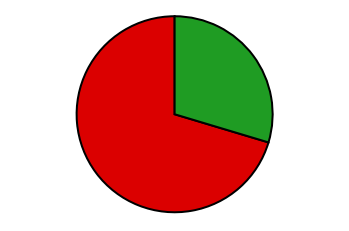

In [20]:
somma1 = 0
somma0 = 0
for elem in y:
    if elem == 1: somma1+=1
    else: somma0 +=1

perc0 = round(somma0/len(y)*100,2)
perc1 = round((100 - perc0),2)
print('studenti con < 40 cfu: ',somma0)
print('studenti con >= 40 cfu: ',somma1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CFU < 40\n'+str(somma0)+'('+str(perc0)+'%)', 'CFU >= 40\n'+str(somma1)+'('+str(perc1)+'%)'
sizes = [somma0, somma1]

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels,startangle=90,colors=[ROSSO,VERDE],wedgeprops={"edgecolor":"k",'linewidth': 2,'antialiased': True},textprops={'fontsize': 20})
ax1.pie(sizes,startangle=90,colors=[ROSSO,VERDE],wedgeprops={"edgecolor":"k",'linewidth': 2,'antialiased': True},textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('generatedImages/sbilanciamentoDataset1.png', dpi=300,bbox_inches='tight',facecolor='w')
plt.show()


In [21]:
# oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
X = X_sm
y = y_sm

studenti con < 40 cfu:  273
studenti con >= 40 cfu:  273


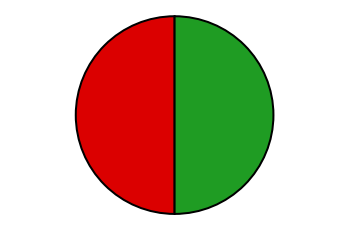

In [22]:
somma1 = 0
somma0 = 0
for elem in y:
    if elem == 1: somma1+=1
    else: somma0 +=1

perc0 = round(somma0/len(y)*100,2)
perc1 = round((100 - perc0),2)
print('studenti con < 40 cfu: ',somma0)
print('studenti con >= 40 cfu: ',somma1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CFU < 40\n'+str(somma0)+'('+str(perc0)+'%)', 'CFU >= 40\n'+str(somma1)+'('+str(perc1)+'%)'
sizes = [somma0, somma1]

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels,startangle=90,colors=[ROSSO,VERDE],wedgeprops={"edgecolor":"k",'linewidth': 2,'antialiased': True},textprops={'fontsize': 20})
ax1.pie(sizes,startangle=90,colors=[ROSSO,VERDE],wedgeprops={"edgecolor":"k",'linewidth': 2,'antialiased': True},textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('generatedImages/bilanciamentoDataset1.png', dpi=300,bbox_inches='tight',facecolor='w')
plt.show()


In [23]:
#   SUDDIVIDO I DATI IN TRAIN E TEST SET, RANDOMIZZANDO L' ORDINE DEGLI ELEMENTI
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size=0.25,random_state=2)
# X_train, X_test, y_regr_train, y_regr_test = train_test_split(X,yregr, train_size=0.75, test_size=0.25,random_state=2)

#   DIMENSIONI X, y
print('dimensioni X: ',X.shape)
print('dimensioni y: ',y.shape)
print('\ndimensioni X_train: ',X_train.shape)
print('dimensioni y_train: ',y_train.shape)
print('dimensioni X_test: ',X_test.shape)
print('dimensioni y_test: ',y_test.shape)

dimensioni X:  (546, 28)
dimensioni y:  (546,)

dimensioni X_train:  (409, 28)
dimensioni y_train:  (409,)
dimensioni X_test:  (137, 28)
dimensioni y_test:  (137,)


In [24]:
#calcolo percentuale di studenti che super i 40 cfu in train set
counts = [0,0]
for i in range(len(y_train)):
    if y_train[i]==0:counts[0]+=1
    else:counts[1]+=1

print(' percentuale di studdenti che superano i 40 cfu in train set: ',counts[1]/(counts[0]+counts[1])*100)

#calcolo percentuale di studenti che super i 40 cfu in test set
counts = [0,0]
for i in range(len(y_test)):
    if y_test[i]==0:counts[0]+=1
    else:counts[1]+=1

print(' percentuale di studdenti che superano i 40 cfu in test set',counts[1]/(counts[0]+counts[1])*100)


 percentuale di studdenti che superano i 40 cfu in train set:  50.36674816625917
 percentuale di studdenti che superano i 40 cfu in test set 48.9051094890511


In [ ]:
#==================================================================================================================================================================
#
#
#
#                                                                ricerca modello migliore
#
#
#
#==================================================================================================================================================================

In [ ]:
labelsRisultatiAccuracy = []
risultatiAccuracy = []
risultatiPrecision = []
risultatiRecall = []
risultatiF1 = []

In [ ]:
#==================================================================================================================================================================
#                                                                     RETE NEURALE 
#==================================================================================================================================================================

In [ ]:
# #normalizzazione input
# Xnorm = tf.keras.utils.normalize(X, axis=1)

# # al solo scopo di mostrare la rete, per cambiare la struttura modificare quella definita nel file "funzioni", dove c'è la funzione "analizza"
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(28, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# #analisi prestazioni
# acc, prec, recall, f1 = analizza(0,Xnorm,y,reteNeurale = True,nloop=300)

In [ ]:
#==================================================================================================================================================================
#                                                                     TPOT CLASSIFICAZIONE
#==================================================================================================================================================================

In [ ]:
#   Internally, TPOT uses joblib to fit estimators in parallel. This is the same parallelization framework used by scikit-learn. 
#   But it may crash/freeze with n_jobs > 1 under OSX or Linux as scikit-learn does, especially with large datasets.
#   One solution is to configure Python's multiprocessing module to use the forkserver start method 
#   (instead of the default fork) to manage the process pools. You can enable the forkserver mode globally for your program by putting 
#   the following codes into your main script:

if USE_TPOT:

    import multiprocessing
    if __name__ == '__main__':
        # multiprocessing.set_start_method('forkserver', force=True)

        #   create an instance of TPOT (n_jobs = -1 utilizza tutti i core disponibili)
        # tpot =  TPOTClassifier(generations = 100, population_size = 100, n_jobs = -1)                             #default                                                                      #impostazioni di default
        # tpot =  TPOTClassifier(generations=2, population_size=20, verbosity=2,n_jobs = -1, random_state=50)       #video 

        tpot =  TPOTClassifier(generations = GENERATIONS, population_size = POP_SIZE, n_jobs = -1)  

    #   You can tell TPOT to optimize a pipeline based on a data set with the fit function
    #   The fit function initializes the genetic programming algorithm to find the highest-scoring 
    #   pipeline based on average k-fold cross-validation. Then, the pipeline is trained on the entire
    #   set of provided samples, and the TPOT instance can be used as a fitted model.
        tpot.fit(X_train, y_train)

In [ ]:
if USE_TPOT:
    #   You can then proceed to evaluate the final pipeline on the testing set with the score function:
    # print(tpot.score(X_test, y_test))
    
    
    # analizza(tpot)

    print('il migliore modello che ho trovato è: \n')
    print(tpot.fitted_pipeline_)

    #   Finally, you can tell TPOT to export the corresponding Python code for the optimized pipeline to a text file with the export function:
    #   Once this code finishes running, tpot_exported_pipeline.py will contain the Python code for the optimized pipeline.

    tpot.export('exported_pipeline_classif1.py')

In [ ]:
#==================================================================================================================================================================
#                                   gradient boosting classifier pipeline(migliore modello trovato)
#==================================================================================================================================================================

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

model = make_pipeline(
        StackingEstimator(estimator=BernoulliNB(alpha=10.0, fit_prior=True)),
        GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.1, min_samples_leaf=7, min_samples_split=12, n_estimators=100, subsample=0.5)
    )

# Fix random state for all the steps in exported pipeline
set_param_recursive(model.steps, 'random_state', 50)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('gradient boosting classifier')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [30]:
#restituisce array con l' importanza delle features per il modello
def importanzaFeatures(modello,X,y,regression = False):

    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, test_size=0.25)
    modello.fit(X_train,y_train)

    if regression:
        explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,mode = "regression")
    else:
        explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,mode = "classification")

    #ogni cella di questo array indica l' importanza di una feature
    importanze = []
    numeroFeatures = len(X_test[0])

    #array contenente l' importanza di ogni feature, inizialmente tutte le features hanno importanza = 0
    importanze = np.zeros(numeroFeatures)
    importanzePos = importanze.copy()
    importanzeNeg = importanze.copy()

    #per ogni elemento di Xtest
    for i in range(len(X_test)):
        #ottengo lista che descrive importanza features
        if regression:
            exp = explainer.explain_instance(X_test[i],predict_fn=modello.predict)
        else:
            exp = explainer.explain_instance(X_test[i],modello.predict_proba)

        lista = exp.as_list()

        print(lista)

        #per ogni elemento della lista, guardo a quale feature corrisponde, e quanta importanza le è associata
        for j in range(len(lista)):
            feature = lista[j][0]
            feature = [int(s) for s in feature.split() if s.isdigit()]
            feature = feature[0]

            # print('feature: ',feature)
   
            importanza = lista[j][1]

            # print('importanza: ',importanza)
            # somma features con incidenza positiva
            if importanza > 0: importanzePos[feature]+= importanza
            # somma features con incidenza negativa
            else: importanzeNeg[feature]+=importanza
            # importanza features generica
            importanza = abs(importanza)
            importanze[feature] += importanza
    print(importanze)

    return importanze, importanzePos, importanzeNeg

In [ ]:
#==================================================================================================================================================================
#                                                                           RANDOM FOREST
#==================================================================================================================================================================

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Average CV score on the training set was: 0.8806451612903226
model = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=17, min_samples_split=5, n_estimators=100)
# Fix random state in exported estimator
if hasattr(model, 'random_state'):
    setattr(model, 'random_state', 50)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('random forest')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                                           DECISION TREE
#==================================================================================================================================================================

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#   dato che non fornisco alcuna indicazione sulla massima profondità dell' albero, avremo probabilmente la massima profondita' possibile
#   di conseguenza andremo probabilment incontro ad overfitting

clf = DecisionTreeClassifier(random_state=0)

In [ ]:
#   cos_complexity_pruning = funzione che mi restituisce due valori: alphas ed impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#   la funzione ci ha restituito questi valori, che corrispondono ai "weak points" rispetto alle foglie
#   questi valori sono un parametro che posso passare al metodo che definisce il decision tree
ccp_alphas

In [ ]:
#   per ogni alpha che ho calcolato, addestro un albero, e lo salvo nell' array di alberi "clfs"
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
#       per ogni albero che ho costruito, calcolo il suo score
#       in questo modo riesco a calcolare il valore di alpha ottimale
#       dove gli score sul train set sono molto alti, ho probabilmente overfitting
#       il punto migliore è quello con il massimo risultato sul test set ed un valore piu o meno simile per il train

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#       visione ampia

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#   zoom
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.xlim([0.005, 0.05])
ax.legend()
plt.show()

In [ ]:
# TEST SPECIFICO SUGLI ALPHA NEL RANGE PIU' INTERESSANTE

#0100
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0100)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
acc_0100 = accuracy_score(y_test, pred)

#0125
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0125)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
acc_0125 = accuracy_score(y_test, pred)

#0150
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0150)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
acc_0150 = accuracy_score(y_test, pred)

#0175
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0175)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
acc_0175 = accuracy_score(y_test, pred)

#020
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.020)
clf.fit(X_train,y_train)

pred=clf.predict(X_test)
acc_0200 = accuracy_score(y_test, pred)

print('acc 01: ',acc_0100)
print('acc 0125: ',acc_0125)
print('acc 0150: ',acc_0150)
print('acc 0175: ',acc_0175)
print('acc 02: ',acc_0200)


In [ ]:
#   ADDESTRAMENTO ALBERO PRUNED
# model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('decision tree')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#   stampo albero potato

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
#==================================================================================================================================================================
#                                                                           SVC
#==================================================================================================================================================================

In [ ]:
#addestramento
from sklearn.svm import SVC
model = SVC(gamma='auto', probability=True)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('SVC')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                                           NAIVE BAYES
#==================================================================================================================================================================

In [ ]:
#   DEFINIZIONE MODELLO
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('naive bayes')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                                     NEAREST NEIGHBOUR
#==================================================================================================================================================================

In [ ]:
del(model)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('nearest neighbour')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                                  SGD
#==================================================================================================================================================================

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

In [ ]:
acc, prec, recall, f1 = analizza(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('SGD')
matrix(model,X_train,y_train,X_test,y_test,regression=False,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                                           TPOT REGRESSIONE
#==================================================================================================================================================================

In [ ]:
#   Internally, TPOT uses joblib to fit estimators in parallel. This is the same parallelization framework used by scikit-learn. 
#   But it may crash/freeze with n_jobs > 1 under OSX or Linux as scikit-learn does, especially with large datasets.
#   One solution is to configure Python's multiprocessing module to use the forkserver start method 
#   (instead of the default fork) to manage the process pools. You can enable the forkserver mode globally for your program by putting 
#   the following codes into your main script:

if USE_TPOT:
    from tpot import TPOTRegressor
    import multiprocessing
    if __name__ == '__main__':
        multiprocessing.set_start_method('forkserver', force=True)

        #   create an instance of TPOT (n_jobs = -1 utilizza tutti i core disponibili)
        # tpot =  TPOTClassifier(generations = 100, population_size = 100, n_jobs = -1)                             #default                                                                      #impostazioni di default
        # tpot =  TPOTClassifier(generations=2, population_size=20, verbosity=2,n_jobs = -1, random_state=50)       #video 

        tpot =  TPOTRegressor(generations = 80, population_size = 80, n_jobs = -1)  

    #   You can tell TPOT to optimize a pipeline based on a data set with the fit function
    #   The fit function initializes the genetic programming algorithm to find the highest-scoring 
    #   pipeline based on average k-fold cross-validation. Then, the pipeline is trained on the entire
    #   set of provided samples, and the TPOT instance can be used as a fitted model.
        tpot.fit(X_train, y_train)

        print('il migliore modello che ho trovato è: \n')
        print(tpot.fitted_pipeline_)

        #   Finally, you can tell TPOT to export the corresponding Python code for the optimized pipeline to a text file with the export function:
        #   Once this code finishes running, tpot_exported_pipeline.py will contain the Python code for the optimized pipeline.

        tpot.export('exported_pipeline_regression1.py')

In [ ]:
#==================================================================================================================================================================
#                                                            REGRESSIONE LINEARE
#==================================================================================================================================================================

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
acc, prec, recall, f1 = analizzaRegr(model,X,y)

risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('regressione lineare')

In [ ]:
cm = matrix(model,X_train,y_train,X_test,y_test,regression=True,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                           random forest regressor pipeline
#==================================================================================================================================================================

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator, ZeroCount
from xgboost import XGBRegressor

model = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.1, max_depth=8, min_child_weight=13, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.05, verbosity=0)),
    MinMaxScaler(),
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.01, max_depth=6, min_child_weight=9, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.15000000000000002, verbosity=0)),
    ZeroCount(),
    RandomForestRegressor(bootstrap=True, max_features=0.4, min_samples_leaf=5, min_samples_split=11, n_estimators=100)
)

In [ ]:
acc, prec, recall, f1 = analizzaRegr(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('random forest regression')

cm = matrix(model,X_train,y_train,X_test,y_test,regression=True,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                                            REGRESSIONE LOGISTICA
#==================================================================================================================================================================

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
acc, prec, recall, f1 = analizzaRegr(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('regressione logistica')

cm = matrix(model,X_train,y_train,X_test,y_test,regression=True,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                            ELASTIC NET REGRESSION TPOT
#==================================================================================================================================================================

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

model = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ElasticNetCV(l1_ratio=0.8, tol=0.01)
)

model.fit(X_train, y_train)

In [ ]:
acc, prec, recall, f1 = analizzaRegr(model,X,y)
risultatiAccuracy.append(acc)
risultatiPrecision.append(prec)
risultatiRecall.append(recall)
risultatiF1.append(f1)
labelsRisultatiAccuracy.append('elastic net regression')

cm = matrix(model,X_train,y_train,X_test,y_test,regression=True,tipoPrevisioneCFU=True)

In [ ]:
#==================================================================================================================================================================
#                                           risultati
#==================================================================================================================================================================

In [ ]:
for i in range(len(labelsRisultatiAccuracy)):
    print(labelsRisultatiAccuracy[i],': ',risultatiAccuracy[i])

In [ ]:
print(labelsRisultatiAccuracy)

In [ ]:
# #scrivo i risultati sul file "performance 1"
# with open('performance1.txt', 'a') as f:
#     f.write("%s\n" % MESE_RIFERIMENTO)
#     for item in risultatiAccuracy:
#         f.write("%s " % item)
#     f.write('\n')
#     for item in risultatiPrecision:
#         f.write("%s " % item)
#     f.write('\n')
#     for item in risultatiRecall:
#         f.write("%s " % item)
#     f.write('\n')
#     for item in risultatiF1:
#         f.write("%s " % item)
#     f.write('\n')